In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline

In [18]:
# Importing Iris Dataset
data_url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

In [5]:
# Creating a model class
# This is a simple neural network with an input layer, inside hidden layers and an output layer.
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, output_feats=3):
       super().__init__()
       self.fc1 = nn.Linear(in_features, h1)
       self.fc2 = nn.Linear(h1, h2)
       self.out = nn.Linear(h2, output_feats)

    def forward(self, x):
        # Rectified linear unit
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.out(x))

        return x

In [6]:
# Manually seeding for randomization to the meaning of life.
torch.manual_seed(42)

model = Model()

In [19]:
data_df = pd.read_csv(data_url)

In [22]:
data_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [21]:
data_df['variety'] = data_df['variety'].replace('Setosa', 0.0)
data_df['variety'] = data_df['variety'].replace('Versicolor', 1.0)
data_df['variety'] = data_df['variety'].replace('Virginica', 2.0)

C:\Users\User\AppData\Local\Temp\ipykernel_16564\1799567608.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df['variety'] = data_df['variety'].replace('Virginica', 2.0)


In [25]:
# Training time.
X = data_df.drop('variety', axis=1)
y = data_df['variety']

X = X.values
y = y.values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [29]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [31]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [36]:
# Setting criteria for model
crits = nn.CrossEntropyLoss()

# Optimizer and learning rate
optim = torch.optim.Adam(model.parameters(), lr=0.01)

In [65]:
# Training!!
epochs = 100
losses = []
for i in range(epochs):
    # forward operation
    y_pred = model.forward(X_train)

    # keeping track of loss
    loss = crits(y_pred, y_train)   # Predicted value vs training valie

    losses.append(loss.detach().numpy())

    if i % 10 == 0:
        print(f"Epoch: {i}, loss {loss}")
    
    # Back propogation: Take the error rate fo fwd prop, and feed it back thru the network to fine-tune the weights.
    optim.zero_grad()
    loss.backward()
    optim.step()

Epoch: 0, loss 0.046815093606710434
Epoch: 10, loss 0.0468040369451046
Epoch: 20, loss 0.04679359495639801
Epoch: 30, loss 0.04678359255194664
Epoch: 40, loss 0.04677467793226242
Epoch: 50, loss 0.046969518065452576
Epoch: 60, loss 0.046952493488788605
Epoch: 70, loss 0.046949729323387146
Epoch: 80, loss 0.04699649661779404
Epoch: 90, loss 0.04681440815329552


Text(0.5, 0, 'epoch')

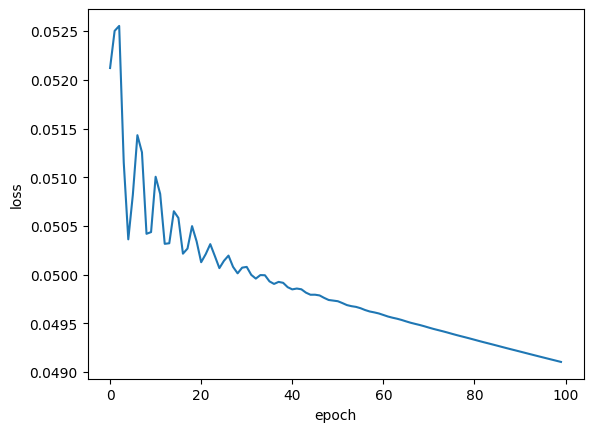

In [54]:
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epoch")

In [55]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = crits(y_eval, y_test)

In [56]:
loss

tensor(0.0279)

In [66]:
corrects = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)

        print(f"{i + 1}. {str(y_val)} \t {y_test[i]}")

        if y_val.argmax().item() == y_test[i]:
            corrects += 1
    
    print(f"Corrects: {corrects}")

1. tensor([ 0.0000, 11.1361,  2.5858]) 	 1
2. tensor([29.8419, 19.2877,  0.0000]) 	 0
3. tensor([ 0.0000,  6.4822, 30.3112]) 	 2
4. tensor([ 0.0000, 10.4204,  4.5201]) 	 1
5. tensor([ 0.0000, 11.3092,  5.1307]) 	 1
6. tensor([27.9333, 18.0421,  0.0000]) 	 0
7. tensor([ 0.3550, 11.6815,  0.0000]) 	 1
8. tensor([ 0.0000,  8.5781, 16.5702]) 	 2
9. tensor([0.0000, 9.4007, 7.8136]) 	 1
10. tensor([ 0.0000, 11.5473,  0.0000]) 	 1
11. tensor([ 0.0000,  9.2209, 12.7280]) 	 2
12. tensor([26.6736, 17.0231,  0.0000]) 	 0
13. tensor([29.3692, 18.8080,  0.0000]) 	 0
14. tensor([27.1300, 17.3254,  0.0000]) 	 0
15. tensor([28.6192, 18.3114,  0.0000]) 	 0
16. tensor([ 0.0000, 10.9890,  4.8519]) 	 1
17. tensor([ 0.0000,  7.2843, 20.7979]) 	 2
18. tensor([ 0.0000, 11.2355,  0.0000]) 	 1
19. tensor([ 0.0000, 10.4932,  2.8081]) 	 1
20. tensor([ 0.0000,  7.0274, 20.5414]) 	 2
21. tensor([26.5158, 16.9186,  0.0000]) 	 0
22. tensor([ 0.0000,  9.2223, 10.2660]) 	 2
23. tensor([27.0777, 17.3569,  0.0000]) 	 0
